# Project 3 - Clustering

<h5 style="font-size: 1.3em;color: #69956e;"> Customer segmentation based on the hotel H’s customer database</h5>
<p>This notebook uses the <em>HotelCustomersDataset.tsv</em> dataset.</p>

<strong>Machine Learning for Marketing 2023/2024</strong>

<strong>Professors:</strong>
- Nuno António
- Ana Edmundo
- Hugo Silva
- Vasco Jesus

<strong>Projet developed by:</strong>
- Anabela Florência, r20201584
- António Cadaixa, r20201505
- Constança Rodrigues, r20201586
- Joana Pimenta, r20201590
- Laura Freitas, 20230172
<br>

<h5 style="font-size: 1.3em;color: #69956e;"> Dataset Description</h5>

- `ID`: Customer ID.
- `Nationality`: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
- `Age`: Customer's age (in years) at the last day of the extraction period.
- `DaysSinceCreation`: Number of days since the customer record was created (number of days elapsed between the creation date and the last day of the extraction period.
- `NameHash`: Name of the customer's SHA2–256 hash string. A hash-string is the string resulting from a mathematical function that maps a string of arbitrary length to fixed-length. Hash functions are used for different purposes. In this case, to allow customer's anonymization.
- `DocIDHash`: SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other).
- `AverageLeadTime`: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customers.
- `LodgingRevenue`: Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses.
- `OtherRevenue`: Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses.
- `BookingsCanceled`: Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay).
- `BookingsNoShowed`: Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel).
- `BookingsCheckedIn`: Number of bookings the customer made, and which end up with a staying.
- `PersonsNights`: The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children.
- `RoomNights`: Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the bookings.
- `DaysSinceLastStays`: The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotels.
- `DaysSinceFirstStays`: The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotels.
- `DistributionChannels`: Distribution channel usually used by the customer to make bookings at the hotels.
- `MarketSegments`: Current market segment of the customers.
- `SRHighFloors`: Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes).
- `SRLowFloors`: Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes).
- `SRAccessibleRooms`: Indication if the customer usually asks for an accessible room (0: No, 1: Yes).
- `SRMediumFloors`: Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes).
- `SRBathtubs`: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes).
- `SRShower`:  Indication if the customer usually asks for a room with a shower (0: No, 1: Yes).
- `SRCrib`: Indication if the customer usually asks for a crib (0: No, 1: Yes).
- `SRKingSizeBed`: Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes).
- `SRTwinBed`: Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes).
- `SRNearElevator`: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes).
- `SRAwayFromElevator`: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes).
- `SRNoAlcoholInMiniBar`: Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes).
- `SRQuietRoom`: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes).
<br>

<h5 style="font-size: 1.3em; color: #69956e;">Work Description</h5>

<p style="color: #000000;">
Finding new customers is vital in every industry. The process for finding new customers begins by learning as much as possible from the existing customers. Understanding current customers allow organizations to identify groups of customers that have different product interests, different market participation, or different response to marketing efforts. Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about opportunities, product definition, positioning, promotions, pricing, and target marketing.
    
Like most hotels, hotel H , a hotel located in Lisbon, Portugal, member of the independent hotel chain C, uses a hospitality standard market segmentation based on the origin of the customer. However, A, the new marketing manager of hotel H, recognized that this type of segmentation, as is today well-known, is not useful for the hotel marketing department.

Until 2015 hotel chain C operated 4 hotels, however, with the acquisition of new hotels, the hotel chain board decided to invest more in marketing. However, it was not until 2018 that the hotel chain created a marketing department and hired a new marketing manager, A. A realized that the current customer segmentation was not adequate, as it only reflected one customer characteristic, its sales origin. It did not reflect geographic characteristics, such as the country of origin, demographic characteristics such as age, or behavioral characteristics such as the number of stays.

Without a proper customer segmentation, is difficult for A to define a strategy to reach new customers and to continue to captivate the current customers. In particular, taking into consideration the multiple distribution channels that hotels operate nowadays (travel agencies, travel operators, online travel agencies - OTA, brand website, meta searchers websites, among others). For example, corporate customers tend to make reservations very near arrival date, book directly with the hotel, and be willing to pay more for a better equipped room, while a customer on holidays tend to make reservations more distant of the arrival date, book with a travel operator or OTA, and to look for better price opportunities. Therefore, products “creation”, pricing definitions, and other marketing tasks, such as advertising, must take into consideration the targets of its efforts, according to the different channels and groups of customers. 

Instead of applying on the traditional hospitality segmentation to divide customers into groups, the challenge proposed by A to the hotel chain marketing department team is to create a more up-to-date, data-driven, customer segmentation based on the hotel H’s customer database. </p>

# Initializations and Data Loading

In [1]:
# Load packages
import os
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

warnings.filterwarnings('ignore')

# To plot in notebook
%matplotlib inline

In [2]:
# Load the prepared dataset 
ds = pd.read_excel('hotel_customers_dataset_prepared.xlsx') 

# Data Understanding

In [3]:
# Display the top 10 rows - provides an overview of the variables and facilitates data understanding
ds.head(10)

,Unnamed: 0,Nationality,Age,AverageLeadTime,RoomNights,PersonsNights,DistributionChannel,MarketSegment,Capped_LodgingRevenue,Capped_OtherRevenue,...,LodgingVsOtherRatio,AvgRevenuePerSegment,TotalSpecialRequests,CancellationRate,NoShowRate,CustomerLoyalty,RecentActivity,StaysPerYear,Log_RevenuePerNight,Log_RevenuePerPerson
0,0,PRT,51.0,45.000000,5.0,8.0,Corporate,Corporate,371.00000,105.300000,...,1.044585,317.424891,0,0.500000,0.00000,537.0,75.5,0.708738,4.386807,3.987543
1,1,PRT,39.0,54.112387,2.0,4.0,Travel Agent/Operator,Other,223.58752,60.086035,...,1.059070,355.029037,0,0.695652,0.26087,593.0,0.0,1.000000,4.559732,4.055859
2,2,DEU,31.0,0.000000,0.0,0.0,Travel Agent/Operator,Travel Agent/Operator,0.00000,0.000000,...,0.000000,290.115552,0,0.000000,0.00000,0.0,0.0,0.250000,0.000000,0.000000
3,3,FRA,60.0,93.000000,5.0,10.0,Travel Agent/Operator,Travel Agent/Operator,240.00000,60.000000,...,1.073162,290.115552,0,0.000000,0.00000,550.0,550.0,0.250000,3.931826,3.341898
4,4,FRA,51.0,0.000000,0.0,0.0,Travel Agent/Operator,Travel Agent/Operator,0.00000,0.000000,...,0.000000,290.115552,0,0.000000,0.00000,0.0,0.0,0.250000,0.000000,0.000000
5,5,JPN,54.0,58.000000,2.0,4.0,Travel Agent/Operator,Other,230.00000,24.000000,...,1.290016,355.029037,0,0.000000,0.00000,548.5,548.5,0.250000,4.450464,3.947390
6,6,JPN,49.0,0.000000,0.0,0.0,Travel Agent/Operator,Other,0.00000,0.000000,...,0.000000,355.029037,0,0.000000,0.00000,0.0,0.0,0.250000,0.000000,0.000000
7,7,FRA,32.0,38.000000,5.0,10.0,Travel Agent/Operator,Other,535.00000,94.000000,...,1.131486,355.029037,1,0.000000,0.00000,550.0,550.0,0.250000,4.661866,4.063573
8,8,FRA,42.0,0.000000,0.0,0.0,Travel Agent/Operator,Other,0.00000,0.000000,...,0.000000,355.029037,1,0.000000,0.00000,0.0,0.0,0.250000,0.000000,0.000000
9,9,IRL,25.0,96.000000,3.0,6.0,Travel Agent/Operator,Travel Agent/Operator,174.00000,69.000000,...,0.984051,290.115552,0,0.000000,0.00000,549.0,549.0,0.250000,4.123094,3.575551


In [4]:
# More detailed information about the DataFrame and the variables

def basic_info(ds):
    print("This dataset has ", ds.shape[1], " columns and ", ds.shape[0], " rows.")
    print("This dataset has ", ds[ds.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(ds.info())
basic_info(ds)

This dataset has  21  columns and  76993  rows.
This dataset has  0  duplicated rows.
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76993 entries, 0 to 76992
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             76993 non-null  int64  
 1   Nationality            76993 non-null  object 
 2   Age                    76993 non-null  float64
 3   AverageLeadTime        76993 non-null  float64
 4   RoomNights             76993 non-null  float64
 5   PersonsNights          76993 non-null  float64
 6   DistributionChannel    76993 non-null  object 
 7   MarketSegment          76993 non-null  object 
 8   Capped_LodgingRevenue  76993 non-null  float64
 9   Capped_OtherRevenue    76993 non-null  float64
 10  HighSpender            76993 non-null  int64  
 11  LodgingVsOtherRatio    76993 non-null  float64
 12  AvgRevenuePerSegment   76993 non-nu

In [5]:
# Obtain the amount of missing values per variable
count_missingvalues = pd.DataFrame(ds.isnull().sum(), columns=['Total Null Data']).reset_index()
count_missingvalues[count_missingvalues['Total Null Data'] != 0]

,index,Total Null Data


#### Conclusion
The data came from a four-star hotel located in Lisbon, Portugal. All personal related data were transformed or anonymized to guaranty privacy and prevent the hotel or guests’ identification. Time-related variables were accounted for based on the last day of the extraction period. The last day of the extraction period is December 31, 2018.
- The dataset has 31 columns and 83590 observations.
- The variable `Age` presents 3779 null values (corresponding to 4.52% of its observations). 
- There is a predominance of numerical variables (int64, float64). However, there are also 5 object variables.
<br>

## Summary Statistics Analysis

In [6]:
# Summary statistics for object variables, to understand them and check for inconsistencies
ds.describe(include=['object']).T

,count,unique,top,freq
Nationality,76993,188,FRA,12183
DistributionChannel,76993,4,Travel Agent/Operator,63872
MarketSegment,76993,7,Other,44839


In [7]:
# Summary statistics for numerical variables, to understand them and check for inconsistencies 
ds.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,76993.0,38496.000000,22226.108975,0.000000,19248.000000,38496.000000,57744.000000,76992.000000
Age,76993.0,45.365819,16.539271,6.000000,33.000000,46.000000,57.000000,100.000000
AverageLeadTime,76993.0,64.360405,76.725086,0.000000,0.000000,32.000000,105.000000,262.500000
RoomNights,76993.0,2.359565,1.920987,0.000000,1.000000,2.000000,4.000000,8.500000
PersonsNights,76993.0,4.676639,4.256937,0.000000,1.000000,4.000000,8.000000,18.500000
Capped_LodgingRevenue,76993.0,276.416794,250.413196,0.000000,66.000000,238.000000,409.200000,890.000000
Capped_OtherRevenue,76993.0,60.003510,67.194878,0.000000,2.000000,41.500000,89.500000,237.780000
HighSpender,76993.0,0.136038,0.342832,0.000000,0.000000,0.000000,0.000000,1.000000
LodgingVsOtherRatio,76993.0,0.907915,0.573932,0.000000,0.826985,1.073454,1.212020,6.242223
AvgRevenuePerSegment,76993.0,336.420305,32.647233,48.221158,308.638517,355.029037,355.029037,513.656335


## Correlation Analysis

### Correlation Matrix Heatmap Analysis

In [8]:
ds.drop(columns=['Unnamed: 0'], inplace=True)

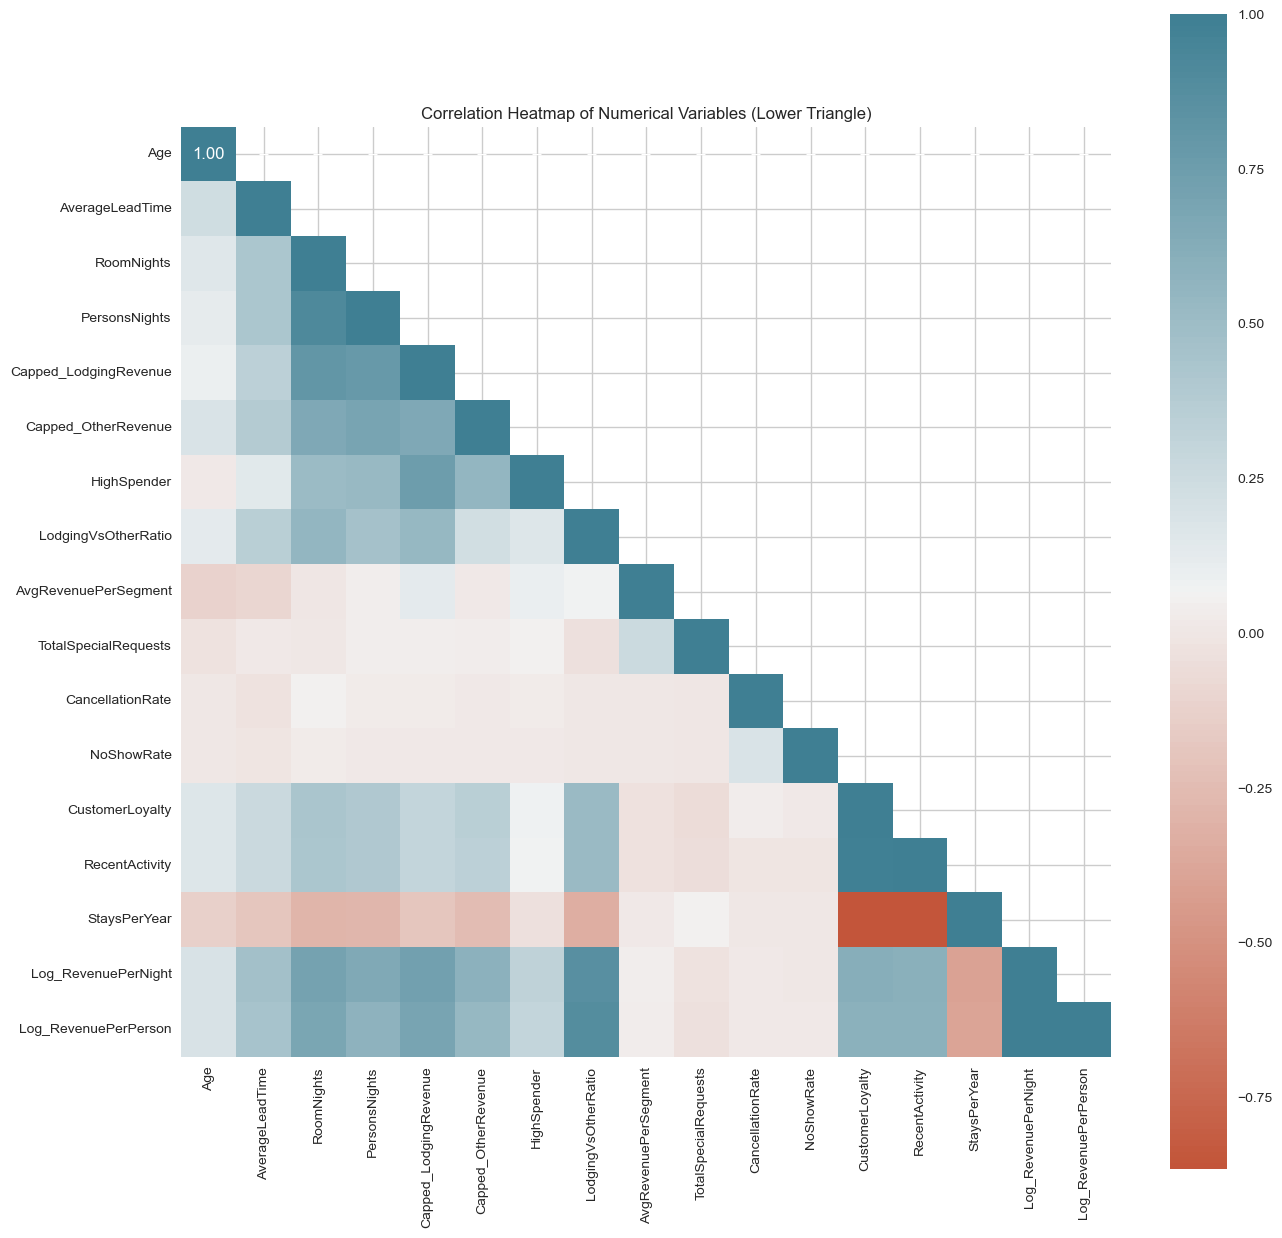

In [9]:
# Visualize the correlation matrix as a heatmap to easily identify relationships between numerical variables

# Select only the numerical columns
numerical_ds = ds.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_ds.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

my_palette = sns.diverging_palette(20, 220, n=200)

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=my_palette, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Variables (Lower Triangle)')
plt.show()

In [10]:
# Create a copy of the original dataset to ensure that all subsequent changes are made on the duplicated dataset
X = ds.copy(deep=True)

In [11]:
# Set the color palette
my_palette = sns.diverging_palette(20, 220, n=200)
color1 = my_palette[199]
color2 = my_palette[150]
color3 = my_palette[100]
color4 = my_palette[50]
color5 = my_palette[1]
campaign_colors = [color1, color2, color3, color4, color5]

## Data Preparation

### Feature Encoding

In [12]:
# Number of unique categories and their value counts for 'Nationality'
nationality_counts = ds['Nationality'].value_counts()
num_unique_nationalities = len(nationality_counts)

print(f"Number of unique nationalities: {num_unique_nationalities}")
print("\nValue counts for 'Nationality':")
print(nationality_counts)

# Number of unique categories and their value counts for 'DistributionChannel'
dist_channel_counts = ds['DistributionChannel'].value_counts()
num_unique_distribution_channel = len(dist_channel_counts)

print(f"Number of unique distribution channel: {num_unique_distribution_channel}")
print("\nValue counts for 'DistributionChannel':")
print(dist_channel_counts)

# Number of unique categories and their value counts for 'MarketSegment'
market_segment_counts = ds['MarketSegment'].value_counts()
num_unique_market_segments = len(market_segment_counts)

print(f"\nNumber of unique market segments: {num_unique_market_segments}")
print("\nValue counts for 'MarketSegment':")
print(market_segment_counts)

Number of unique nationalities: 188

Value counts for 'Nationality':
Nationality
FRA    12183
DEU    10025
GBR     8422
PRT     7106
ESP     4675
       ...  
GIN        1
KNA        1
GNQ        1
JEY        1
NPL        1
Name: count, Length: 188, dtype: int64
Number of unique distribution channel: 4

Value counts for 'DistributionChannel':
DistributionChannel
Travel Agent/Operator      63872
Direct                     10768
Corporate                   1922
Electronic Distribution      431
Name: count, dtype: int64

Number of unique market segments: 7

Value counts for 'MarketSegment':
MarketSegment
Other                    44839
Travel Agent/Operator    11058
Direct                   10354
Groups                    8690
Corporate                 1518
Complementary              363
Aviation                   171
Name: count, dtype: int64


#### Conclusion
- **Nationality**: With 188 unique values, one-hot encoding could result in a very sparse matrix. A better approach might be to use frequency encoding (replacing the categories with their corresponding frequency counts) or target encoding.
- **DistributionChannel**: With only 4 unique values, one-hot encoding is appropriate.
- **MarketSegment**: With 7 unique values, one-hot encoding is also appropriate.

In [13]:
# Frequency Encoding for 'Nationality'
nationality_counts = X['Nationality'].value_counts()
X['Nationality'] = X['Nationality'].map(nationality_counts)

In [14]:
# List of categorical columns to encode
cols = ['DistributionChannel', 'MarketSegment']
ce_one_hot = ce.OneHotEncoder(cols=cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [15]:
X.head()

,Nationality,Age,AverageLeadTime,RoomNights,PersonsNights,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,MarketSegment_Corporate,...,LodgingVsOtherRatio,AvgRevenuePerSegment,TotalSpecialRequests,CancellationRate,NoShowRate,CustomerLoyalty,RecentActivity,StaysPerYear,Log_RevenuePerNight,Log_RevenuePerPerson
0,7106,51.0,45.000000,5.0,8.0,1,0,0,0,1,...,1.044585,317.424891,0,0.500000,0.00000,537.0,75.5,0.708738,4.386807,3.987543
1,7106,39.0,54.112387,2.0,4.0,0,1,0,0,0,...,1.059070,355.029037,0,0.695652,0.26087,593.0,0.0,1.000000,4.559732,4.055859
2,10025,31.0,0.000000,0.0,0.0,0,1,0,0,0,...,0.000000,290.115552,0,0.000000,0.00000,0.0,0.0,0.250000,0.000000,0.000000
3,12183,60.0,93.000000,5.0,10.0,0,1,0,0,0,...,1.073162,290.115552,0,0.000000,0.00000,550.0,550.0,0.250000,3.931826,3.341898
4,12183,51.0,0.000000,0.0,0.0,0,1,0,0,0,...,0.000000,290.115552,0,0.000000,0.00000,0.0,0.0,0.250000,0.000000,0.000000


### Feature Scaling

In [16]:
# Summary statistics for numerical variables, to understand them and check for inconsistencies 
X.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
Nationality,76993.0,5927.709389,4163.212978,1.000000,2061.000000,4675.000000,10025.000000,12183.000000
Age,76993.0,45.365819,16.539271,6.000000,33.000000,46.000000,57.000000,100.000000
AverageLeadTime,76993.0,64.360405,76.725086,0.000000,0.000000,32.000000,105.000000,262.500000
RoomNights,76993.0,2.359565,1.920987,0.000000,1.000000,2.000000,4.000000,8.500000
PersonsNights,76993.0,4.676639,4.256937,0.000000,1.000000,4.000000,8.000000,18.500000
DistributionChannel_Corporate,76993.0,0.024963,0.156014,0.000000,0.000000,0.000000,0.000000,1.000000
DistributionChannel_Travel Agent/Operator,76993.0,0.829582,0.376002,0.000000,1.000000,1.000000,1.000000,1.000000
DistributionChannel_Direct,76993.0,0.139857,0.346841,0.000000,0.000000,0.000000,0.000000,1.000000
DistributionChannel_Electronic Distribution,76993.0,0.005598,0.074610,0.000000,0.000000,0.000000,0.000000,1.000000
MarketSegment_Corporate,76993.0,0.019716,0.139024,0.000000,0.000000,0.000000,0.000000,1.000000


#### Scaling Variable 'Age'
- Option 1: Quantile Binning and Scaling
    - Ensures equal representation across bins
    - Reduces the impact of outliers by distributing data points evenly
    - Might not be intuitive or easy to interpret in terms of actual age ranges
    - Requires additional scaling (Min-Max or StandardScaler)
- Option 2: Min-Max Scaling
    - Simple and straightforward, preserving the original distribution of data
    - Does not provide segmentation for specific analysis
    - Outliers can significantly affect the scaling
- Option 3: **Custom Binning with Defined Intervals**
    - Intuitive and easy to interpret
    - Allows for targeted segmentation based on specific analysis needs
    - Uneven distribution across bins, which may affect the performance of certain algorithms

Since our goal is to analyze and segment the data meaningfully, we consider the option 3 the best choice, since it provides clear and interpretable segments.

In [17]:
# We will divide the 'Age' into bins to analyze its distribution and later bin the variable

min_revenue = X['Age'].min()
max_revenue = X['Age'].max()
num_bins = 10
bins = pd.cut(X['Age'], bins=num_bins)
bin_counts = bins.value_counts().sort_index()
print("Intervals of Age:")
print(bin_counts)

Intervals of Age:
Age
(5.906, 15.4]     3597
(15.4, 24.8]      4301
(24.8, 34.2]     12816
(34.2, 43.6]     13331
(43.6, 53.0]     17883
(53.0, 62.4]     13198
(62.4, 71.8]      7675
(71.8, 81.2]      3664
(81.2, 90.6]       517
(90.6, 100.0]       11
Name: count, dtype: int64


In [18]:
# Generate quantile breakpoints for the 'Age' variable
quantiles = X['Age'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# Display the quantiles
quantiles

0.1    24.0
0.2    31.0
0.3    36.0
0.4    41.0
0.5    46.0
0.6    50.0
0.7    55.0
0.8    60.0
0.9    67.0
Name: Age, dtype: float64

In [19]:
# Define personalized bins and labels based on quantiles and interpretability
personalized_bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
personalized_labels = ['<24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '>65']

# Create the personalized bins using cut function
X['Age_bins_personalized'] = pd.cut(X['Age'], bins=personalized_bins, labels=personalized_labels, right=False)

age_bins_dummies = pd.get_dummies(X['Age_bins_personalized'], prefix='Age', dtype='int')

X = pd.concat([X, age_bins_dummies], axis=1)

X = X.drop(['Age', 'Age_bins_personalized'], axis=1)

In [20]:
X.head()

,Nationality,AverageLeadTime,RoomNights,PersonsNights,DistributionChannel_Corporate,DistributionChannel_Travel Agent/Operator,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,MarketSegment_Corporate,MarketSegment_Other,...,Age_<24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-64,Age_>65
0,7106,45.000000,5.0,8.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,7106,54.112387,2.0,4.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,10025,0.000000,0.0,0.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,12183,93.000000,5.0,10.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12183,0.000000,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# Get a copy of the dataframe before normalization for results' analysis
X_beforeNorm = X.copy(deep=True)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76993 entries, 0 to 76992
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Nationality                                  76993 non-null  int64  
 1   AverageLeadTime                              76993 non-null  float64
 2   RoomNights                                   76993 non-null  float64
 3   PersonsNights                                76993 non-null  float64
 4   DistributionChannel_Corporate                76993 non-null  int64  
 5   DistributionChannel_Travel Agent/Operator    76993 non-null  int64  
 6   DistributionChannel_Direct                   76993 non-null  int64  
 7   DistributionChannel_Electronic Distribution  76993 non-null  int64  
 8   MarketSegment_Corporate                      76993 non-null  int64  
 9   MarketSegment_Other                          76993 non-null  int64  
 10

In [23]:
# Apply Standard Scaling to all variables since before applying PCA, it's important to standardize the features to have mean 0 and variance 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [24]:
# Check DataFrame structure and statistics after all transformations
print(X.shape)
X.describe(include='all').T

(76993, 38)


,count,mean,std,min,25%,50%,75%,max
0,76993.0,7.382933e-17,1.000006,-1.423599,-0.928786,-0.300902,0.984172,1.502525
1,76993.0,-6.496981e-17,1.000006,-0.838850,-0.838850,-0.421774,0.529682,2.582478
2,76993.0,4.725077e-17,1.000006,-1.228316,-0.707747,-0.187178,0.853960,3.196520
3,76993.0,-3.543808e-17,1.000006,-1.098600,-0.863688,-0.158951,0.780698,3.247277
4,76993.0,-3.876040e-18,1.000006,-0.160008,-0.160008,-0.160008,-0.160008,6.249703
5,76993.0,-1.476587e-16,1.000006,-2.206337,0.453240,0.453240,0.453240,0.453240
6,76993.0,-4.725077e-17,1.000006,-0.403233,-0.403233,-0.403233,-0.403233,2.479953
7,76993.0,0.000000e+00,1.000006,-0.075029,-0.075029,-0.075029,-0.075029,13.328093
8,76993.0,3.691467e-17,1.000006,-0.141819,-0.141819,-0.141819,-0.141819,7.051243
9,76993.0,-8.813377e-17,1.000006,-1.180893,-1.180893,0.846817,0.846817,0.846817


## Feature Selection - PCA

We thought about performing Random Forest to understand better the importance of each variable but since we don't have a target variable and our goal is unsupervised learning (customer segmentation), using it for feature importance isn't directly applicable. By using PCA instead, we can:
- Guarantee dimensionality reduction: PCA reduces the feature space while retaining important information
- Guarantee uncorrelated Features: PCA components are uncorrelated, helping with multicollinearity issue
- Guarantee efficiency: PCA simplifies the model, leading to faster training and better interpretability

In [25]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)
print(X_pca2.shape)

(76993, 2)


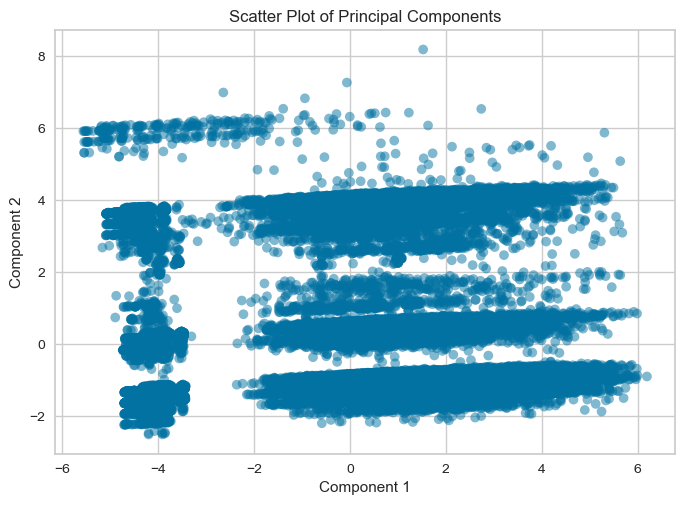

In [26]:
# Scatter plot of the two Principal Components

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter Plot of Principal Components')
plt.show()



#### Conclusion
 - This scatter plot highlights that the dataset contains distinct groupings or patterns when viewed through the lens of PCA, with the first principal component capturing significant variation and the second component providing additional, though less pronounced, separation of the data.

In [27]:
# Fit PCA
pca = PCA().fit(X)

In [28]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain 85% variance
n_components_85 = np.argmax(cumulative_explained_variance >= 0.85) + 1
n_components_85

#This result can tell us that by having 19 components, we can reduce the dimensionality of the data while retaining most of 85% its variability, which is the percentage that we thought ideal to mantain, for not being too low or too impossible.

19

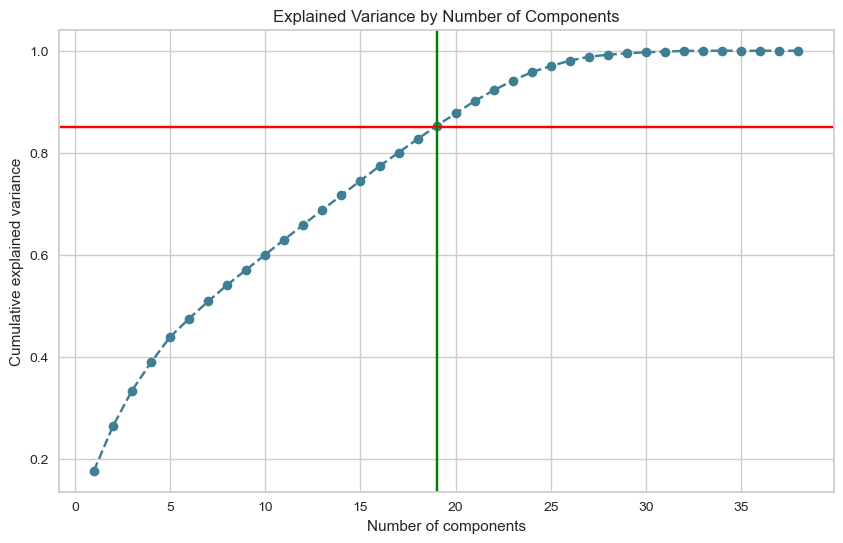

In [29]:
# Plot the cumulative explained variance

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color=color1)
plt.axhline(y=0.85, color='red', linestyle='-')
plt.axvline(x=n_components_85, color='green', linestyle='-')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

#### Conclusion
- The graphic confirms that 19 principal components are needed to explain 85% of the variance.
- It visually demonstrates how the cumulative explained variance increases with the number of components and help us deciding the appropriate number of components to retain for dimensionality reduction.
- We can also see that we have an 'elbow' on the 5 and on the 25 components (more or less), but we thought that reducing 37 variables for only 5 components might be a radical cut and having 25 components was way too much, so we decided to proceed with 19.

In [30]:
# Compute the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(correlation_matrix)

# Sort eigenvalues in descending order
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

# Calculate differences between consecutive eigenvalues
differences = np.diff(eigenvalues, prepend=0)

# Calculate proportion of each eigenvalue
proportion = eigenvalues / eigenvalues.sum()

# Calculate cumulative proportion
cumulative_proportion = np.cumsum(proportion)

# Create DataFrame to display the results
eigenvalues_df = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Difference': differences,
    'Proportion': proportion,
    'Cumulative': cumulative_proportion
})

eigenvalues_df

,Eigenvalue,Difference,Proportion,Cumulative
0,6.723603e+00,6.723603e+00,1.769369e-01,0.176937
1,3.316538e+00,-3.407065e+00,8.727731e-02,0.264214
2,2.654003e+00,-6.625349e-01,6.984218e-02,0.334056
3,2.099928e+00,-5.540750e-01,5.526126e-02,0.389318
4,1.888779e+00,-2.111490e-01,4.970470e-02,0.439022
5,1.363639e+00,-5.251393e-01,3.588525e-02,0.474908
6,1.292817e+00,-7.082225e-02,3.402150e-02,0.508929
7,1.219603e+00,-7.321380e-02,3.209482e-02,0.541024
8,1.132756e+00,-8.684695e-02,2.980938e-02,0.570833
9,1.126292e+00,-6.464630e-03,2.963926e-02,0.600473


#### Conclusion
- Once again, with the values presented on the table, we can check that we got 0.85 (85%) on the 'cumulative' column exactly on the row that matches the 19 principal components (being on the 18 row since it begins with 0). 

In [31]:
# Create a DataFrame for the eigenvectors
eigenvectors_df = pd.DataFrame(eigenvectors[:, :19], index=X.columns, columns=[f'PC{i+1}' for i in range(19)])
eigenvectors_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.019066,0.014748,-0.101662,0.051268,-0.062684,0.166416,-0.164894,0.222602,-0.028307,-0.010208,-0.061877,-0.017558,-0.071256,-0.058137,-0.103191,-0.024636,0.187220,0.198070,0.348681
1,-0.201424,-0.015907,-0.097790,0.173775,-0.021337,-0.194118,-0.086718,0.021940,-0.021210,-0.031511,-0.020438,0.008466,0.000446,-0.015428,-0.002275,-0.015706,0.185380,0.141438,0.052600
2,-0.327173,0.020224,0.076466,0.187205,0.079445,0.069110,-0.012864,0.008301,0.007628,-0.029738,0.018580,-0.016665,-0.017472,0.013650,-0.006196,0.001536,-0.027405,-0.046091,0.005240
3,-0.312060,0.000248,0.118329,0.210756,0.023534,0.128407,-0.052843,-0.005825,0.014698,0.016318,0.027932,-0.009362,-0.024178,0.008204,-0.013842,0.014042,-0.033781,-0.011597,0.028514
4,-0.009025,0.140117,-0.034074,-0.253201,0.555845,0.037411,-0.048150,-0.037816,-0.020731,0.126960,0.079415,-0.113250,-0.077273,-0.088783,0.065897,0.015991,0.025380,-0.010096,0.103145
5,-0.037619,-0.491646,-0.195052,0.130845,-0.012633,-0.002121,-0.008209,0.026621,0.018654,-0.012508,0.001015,0.016557,0.011240,0.035595,0.006062,0.009699,-0.126798,0.045022,-0.072746
6,0.044981,0.467250,0.218577,-0.010698,-0.236891,-0.003874,-0.028146,-0.047461,-0.010731,-0.040697,-0.009473,0.004003,-0.012469,-0.003542,-0.008597,-0.032873,0.000261,0.069779,0.020857
7,-0.000647,0.012576,0.038128,-0.080209,0.002597,-0.049531,0.272896,0.165548,-0.000770,-0.013254,-0.127140,0.134765,0.162902,0.022732,-0.128380,0.070497,0.584725,-0.530159,0.053967
8,-0.001132,0.116906,-0.037438,-0.200535,0.507972,0.090326,0.085747,-0.023810,-0.030928,0.199763,0.102181,-0.158918,-0.162461,-0.126456,0.025152,0.012176,0.186420,0.236147,-0.060374
9,-0.017156,-0.428428,0.272383,-0.150954,-0.070571,0.142360,0.078424,-0.093789,-0.013596,0.009415,-0.003727,0.016650,0.005907,-0.025456,-0.027059,-0.007880,0.128176,0.019025,0.067361


In [55]:
eigenvectors_df.to_excel("eigenvectors_df_19components.xlsx")

# Modeling - Using 19 components from PCA

In [33]:
# Apply PCA to reduce to 19 components
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X)

## Hierarchical Methods

In [34]:
# Hierarchical clustering might not be suitable for very large datasets due to memory and computational constraints
# We kept on getting the following error message: MemoryError: Unable to allocate 22.1 GiB for an array with shape (2963922528,) and data type float64
# To overcome it, we used a smaller subset of the data 

# Take a random sample of the data to perform hierarchical clustering
np.random.seed(42)
sample_indices = np.random.choice(X_pca.shape[0], size=1000, replace=False)
X_pca_sample = X_pca[sample_indices]

# Define clustering methods
methods = ['ward', 'average', 'centroid', 'complete', 'single']

# Initialize a dictionary to store R-squared values
r_squared = {method: [] for method in methods}

# Calculate total sum of squares (TSS)
overall_mean = np.mean(X_pca_sample, axis=0)
TSS = np.sum((X_pca_sample - overall_mean) ** 2)

# Perform hierarchical clustering for each method and calculate R-squared
for method in methods:
    linked = linkage(X_pca_sample, method=method)
    for k in range(1, 11):
        clusters = fcluster(linked, k, criterion='maxclust')
        cluster_centroids = np.array([X_pca_sample[clusters == i].mean(axis=0) for i in range(1, k + 1)])
        WCSS = np.sum([np.sum((X_pca_sample[clusters == i] - centroid) ** 2) for i, centroid in enumerate(cluster_centroids, 1)])
        r_squared[method].append(1 - WCSS / TSS)

# Create a DataFrame to display the results
r_squared_df = pd.DataFrame(r_squared, index=range(1, 11))
r_squared_df.index.name = 'Nr of Clusters'

r_squared_df

,ward,average,centroid,complete,single
Nr of Clusters,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.131346,0.086823,0.086823,0.086823,0.086823
3,0.222620,0.122539,0.122539,0.135302,0.122539
4,0.308042,0.149402,0.149402,0.149402,0.149402
5,0.360484,0.154762,0.154762,0.190559,0.154762
6,0.399549,0.195919,0.195919,0.195919,0.195919
7,0.437326,0.219502,0.219502,0.219502,0.219502
8,0.464392,0.261542,0.252467,0.261542,0.220795
9,0.488510,0.263390,0.255739,0.398730,0.223000


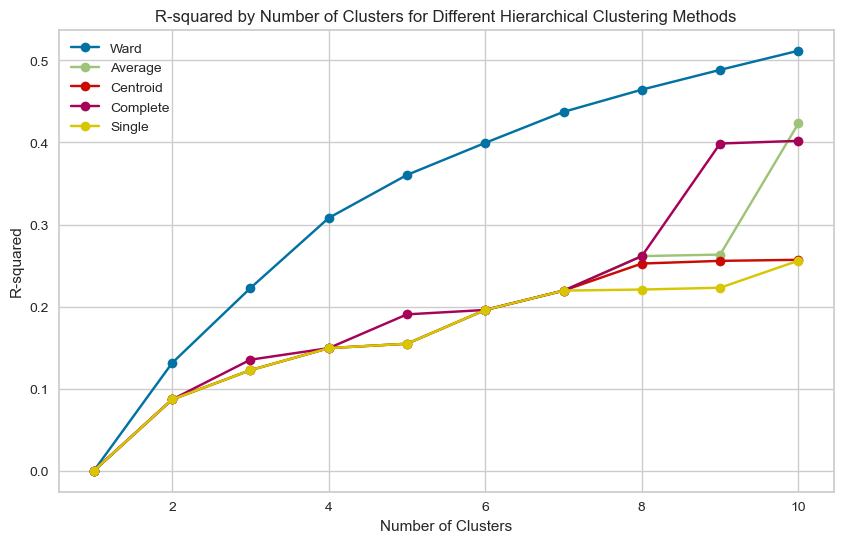

In [35]:
# Plot the R-squared values

plt.figure(figsize=(10, 6))
for method in methods:
    plt.plot(r_squared_df.index, r_squared_df[method], marker='o', label=method.capitalize())
plt.title('R-squared by Number of Clusters for Different Hierarchical Clustering Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('R-squared')
plt.legend()
plt.grid(True)
plt.show()

#### Conclusion on Final Hierarchical Method
- Given its superior performance in terms of R-squared values, Ward's method should be used for the final clustering analysis. It provides the highest cluster homogeneity and is the most reliable for this dataset.

In [36]:
np.random.seed(42)
sample_indices = np.random.choice(X_pca.shape[0], size=1000, replace=False)
X_pca_sample = X_pca[sample_indices]

# Perform hierarchical clustering using the Ward method
linked = linkage(X_pca_sample, method='ward')

clustering_history = []

n_points = X_pca_sample.shape[0]

overall_mean = np.mean(X_pca_sample, axis=0)
TSS = np.sum((X_pca_sample - overall_mean) ** 2)

# Iterate through each step of clustering
previous_WCSS = TSS
for k in range(1, 11):
    # Create clusters
    clusters = fcluster(linked, k, criterion='maxclust')
    
    # Calculate within-cluster sum of squares (WCSS)
    cluster_centroids = np.array([X_pca_sample[clusters == i].mean(axis=0) for i in range(1, k + 1)])
    WCSS = np.sum([np.sum((X_pca_sample[clusters == i] - centroid) ** 2) for i, centroid in enumerate(cluster_centroids, 1)])
    
    # Calculate RMSSTD
    RMSSTD = np.sqrt(WCSS / (n_points - k))
    
    # Calculate R-squared
    R2 = 1 - WCSS / TSS
    
    # Calculate Semi-Partial R-squared (SPR2)
    SPR2 = (previous_WCSS - WCSS) / TSS
    previous_WCSS = WCSS
    
    # Store the step, number of clusters, RMSSTD, SPR2, and R2
    clustering_history.append({'Step': k, 'Number of Clusters': k, 'RMSSTD': RMSSTD, 'SPR2': SPR2, 'R2': R2})

# Convert the history to a DataFrame
clustering_history_df = pd.DataFrame(clustering_history)
clustering_history_df.set_index('Step', inplace=True)

clustering_history_df.head(10)

,Number of Clusters,RMSSTD,SPR2,R2
Step,,,,
1,1,5.989902,0.000000,0.000000
2,2,5.585480,0.131346,0.131346
3,3,5.286540,0.091274,0.222620
4,4,4.990139,0.085422,0.308042
5,5,4.799727,0.052442,0.360484
6,6,4.653160,0.039065,0.399549
7,7,4.506674,0.037777,0.437326
8,8,4.399164,0.027066,0.464392
9,9,4.301145,0.024118,0.488510


#### Conclusion on Optimal Number of Clusters

- The lower the value of RMSSTD, the better the separation of clusters
- The R-squared value is used to determine whether there is a significant difference among objects in different groups and that objects in the same group have high similar behaviour
- SPR2 (semipartial R-squared) is a measure of the homogeneity of merged clusters, in other words how similar the cluster elements are to each other. Thus, the SPR2 values should be small to imply that we are merging two homogeneous groups

References:
*https://www.sas.com/content/dam/SAS/en_ca/User%20Group%20Presentations/TASS/Das-Cluster-Jun2011.pdf*
*https://www.thaiscience.info/journals/Article/TKJN/10974284.pdf*

Considering these metrics collectively, we conclude that maintaining **5 clusters** aligns with the data's structure and yields the most meaningful segmentation for our analysis!

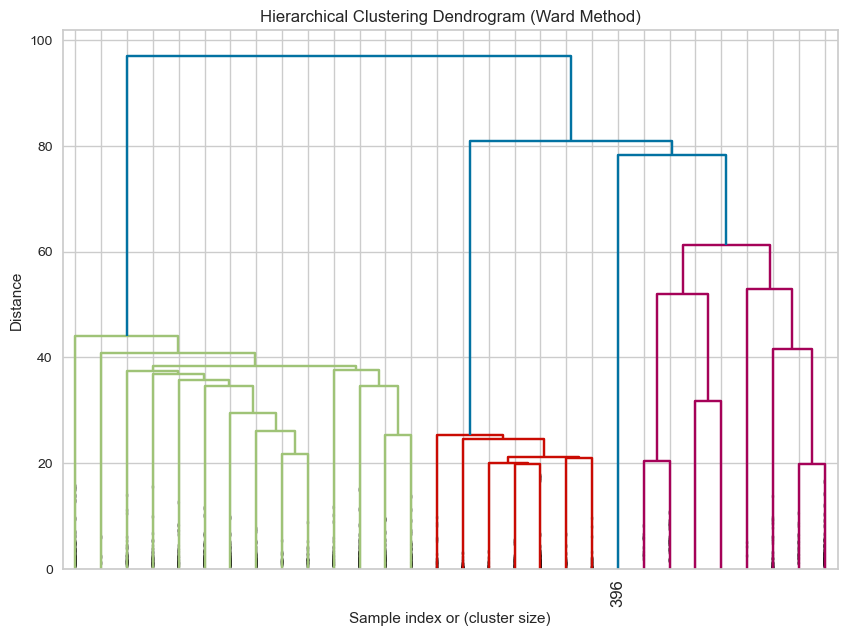

In [37]:
# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

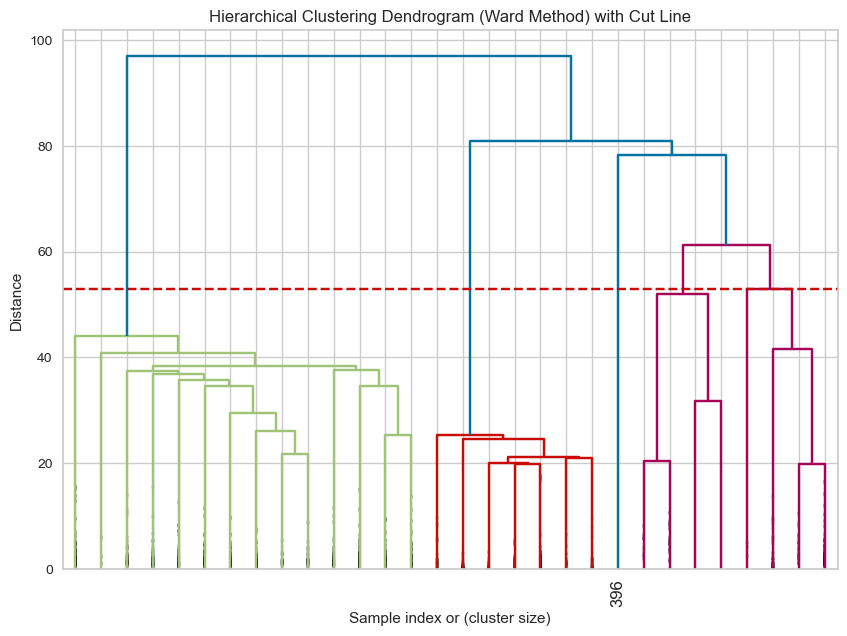

In [38]:
# Determine the optimal number of clusters by cutting the dendrogram
# Here, we assume 5 clusters based on previous analysis
optimal_clusters = 5

# Create the dendrogram and plot the cut line at the desired number of clusters
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Method) with Cut Line')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.axhline(y=linked[-optimal_clusters, 2], color='r', linestyle='--')
plt.show()

## Non-Hierarchical Methods

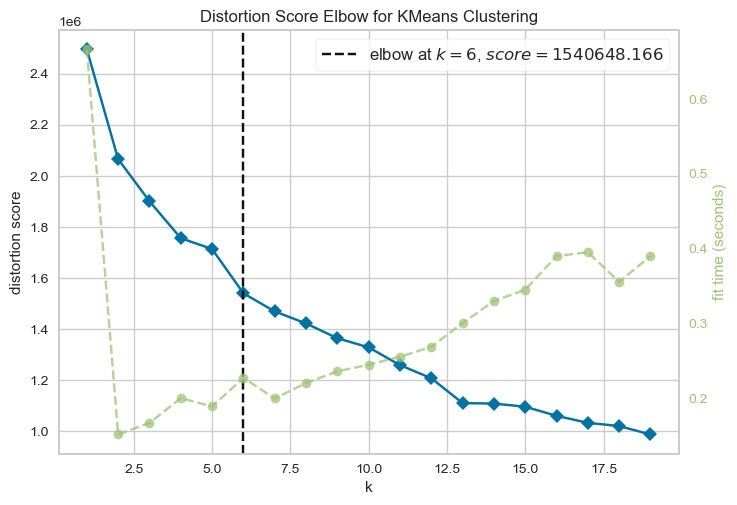

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Given that the hierarchical clustering analysis suggested 5 clusters as an appropriate choice, it's still a good practice to verify this using the Elbow method with K-means
# The Elbow method provides a visual confirmation and ensures that 5 clusters are indeed a reasonable choice

km = KMeans(random_state=123)
visualizer = KElbowVisualizer(km, k=(1, 20), random_state=123)
visualizer.fit(X_pca)
visualizer.show()

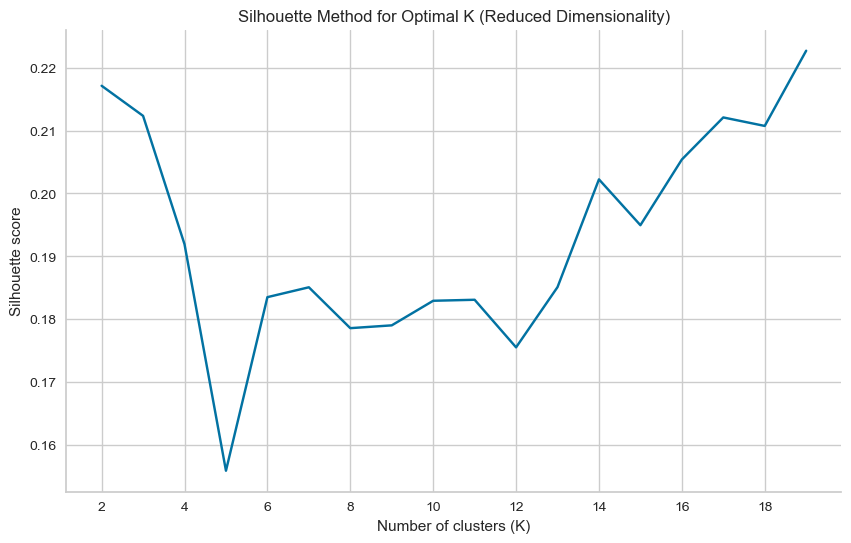

In [40]:
# Select K based on the Silhouette method
sil = []

# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=123).fit(X_pca)
    labels = km.labels_
    sil.append(silhouette_score(X_pca, labels, metric='euclidean'))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(2, 20), sil, 'bx-')
sns.despine()
fmt = "{x:,.2f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method for Optimal K (Reduced Dimensionality)')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

#### Conclusion
The methods performed before indicate K should be around 5, but the Silhouette method points to higher values, such as 16 or 18. However, since large number of clusters are not very helpful for marketing pruposes, we chose to select K as 5 for this notebook.

## Results - K-means with k=5

In [41]:
# Select the optimal number of clusters based on previous methods

K=5
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca)
cluster_labels = kmeans.fit_predict(X_pca)

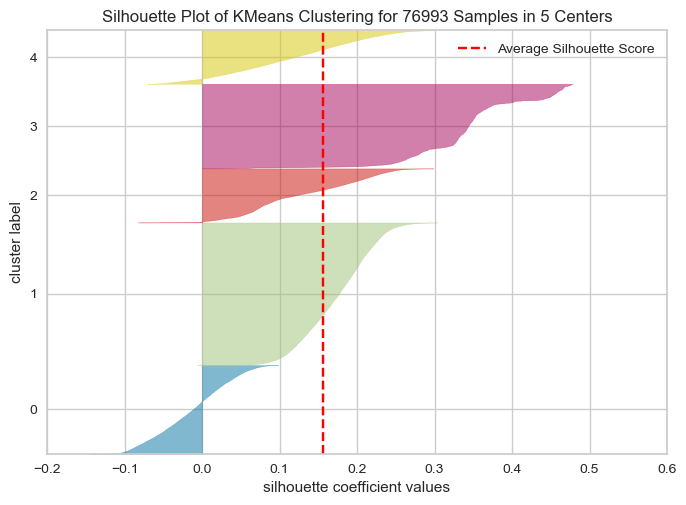

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 76993 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
# Visualize silhouette plot

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca)
visualizer.show()

In [43]:
# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}')

Silhouette Score for 5 clusters: 0.15590272516462347


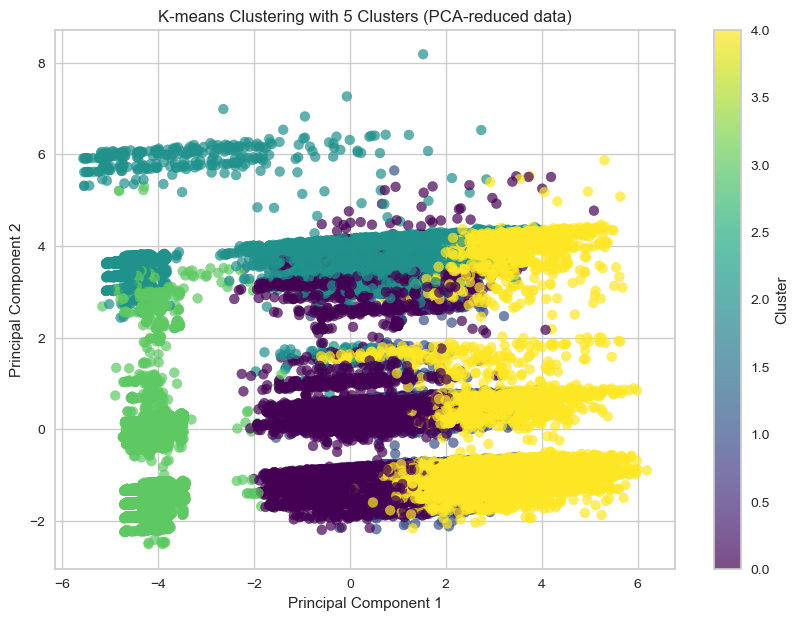

In [45]:
# Add the cluster labels to the PCA-transformed data for further analysis
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(19)])
X_pca_df['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=X_pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title(f'K-means Clustering with {optimal_clusters} Clusters (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [46]:
X_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,Cluster
0,1.722025,4.511426,-0.105393,4.272943,13.773382,5.180750,4.901153,2.813236,-1.045138,7.703719,4.234135,5.377054,1.393686,3.524069,4.498522,0.929885,1.754374,3.079204,3.459523,0
1,0.606704,1.581314,-1.591506,3.931470,14.186658,7.917073,10.721495,6.671167,4.068804,24.920358,10.837500,15.070334,6.310496,14.919832,14.997543,1.316384,3.190393,8.723836,14.213337,0
2,-3.542121,0.218343,2.687839,-0.686072,-0.240484,1.344536,0.061888,-1.562931,0.266614,1.216846,0.489986,0.082878,-2.315257,-0.303393,-0.260194,-1.424700,-1.064414,-0.352808,-0.529169,3
3,2.543131,0.641147,3.473556,-0.002912,-0.912161,1.710769,1.241234,-1.406406,0.680263,0.133202,-0.535614,-0.171965,-0.665597,2.162629,-2.161327,0.966764,0.809381,-0.048458,-0.317059,1
4,-3.459073,0.238540,2.698401,-0.851302,-0.142945,1.795894,1.200310,-2.024433,-2.150069,-0.465377,0.805104,0.252628,0.564461,-0.106699,-0.178610,-0.265253,-0.526113,0.250796,-0.307639,3


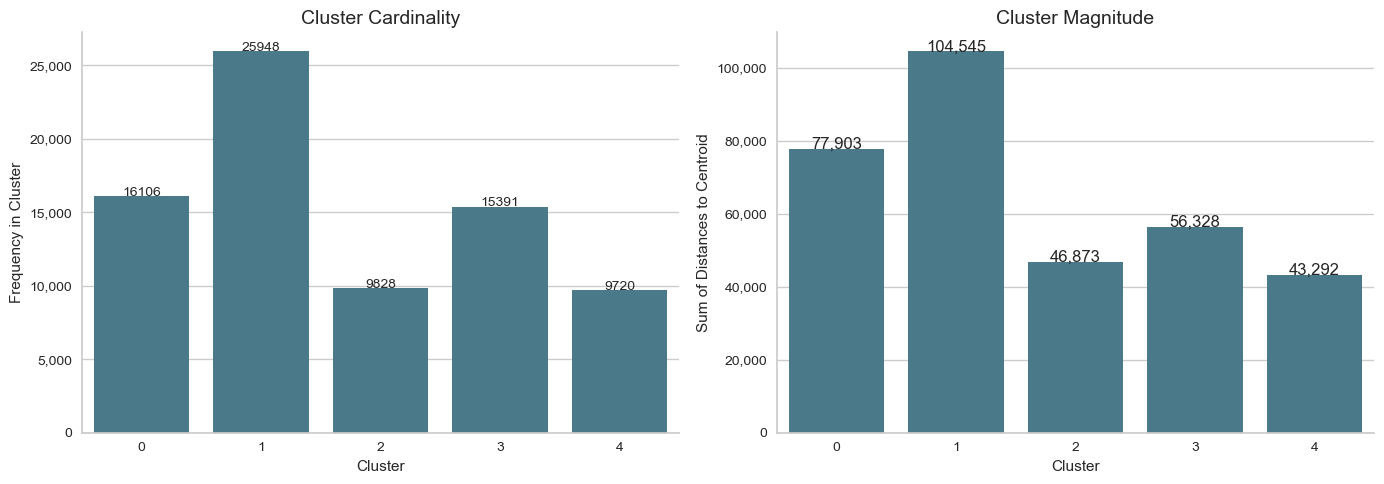

In [47]:
# Compute Magnitude
X_pca_df['distanceToCentroid'] = np.min(allDistances, axis=1)
magnitude = X_pca_df['distanceToCentroid'].groupby(cluster_labels).sum()
X_pca_df = X_pca_df.drop(columns=['distanceToCentroid'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot clusters cardinality
sns.countplot(x=X_pca_df['Cluster'], color=color1, ax=ax1)
freqByCluster = X_pca_df['Cluster'].value_counts().sort_index()

fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)

for index, data in enumerate(freqByCluster):
    ax1.text(x=index, y=data + 5, s=f"{data}", ha='center', fontsize=10)

sns.despine(ax=ax1)
ax1.set_title("Cluster Cardinality", fontsize=14)
ax1.set_xlabel("Cluster")
ax1.set_ylabel("Frequency in Cluster")
plt.rc('axes', labelsize=12)

# Plot clusters magnitude
sns.barplot(x=magnitude.index, y=magnitude.values, color=color1, ax=ax2)

ax2.yaxis.set_major_formatter(tick)

for index, data in enumerate(magnitude):
    ax2.text(x=index, y=data + 50, s=f"{data:,.0f}", ha='center', fontsize=12)

sns.despine(ax=ax2)
ax2.set_title("Cluster Magnitude", fontsize=14)
ax2.set_xlabel("Cluster")
ax2.set_ylabel("Sum of Distances to Centroid")
plt.rc('axes', labelsize=12)

plt.tight_layout()
plt.show()

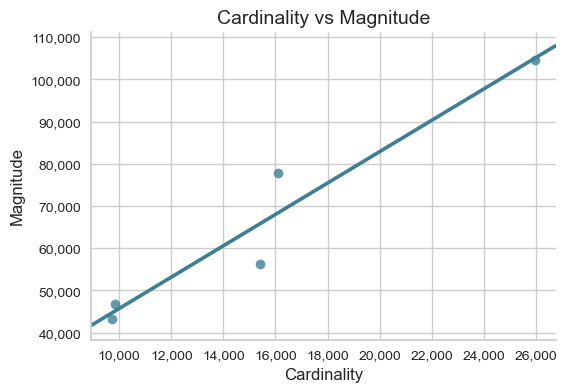

In [48]:
# Plot cardinality vs magnitude
fig, ax = plt.subplots(figsize=(6, 4))

# Create a regression plot
sns.regplot(x=freqByCluster.values, y=magnitude.values, scatter=True, seed=123, truncate=False, ci=None, color=color1)

fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)

sns.despine()

plt.title("Cardinality vs Magnitude", fontsize=14)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=12)

plt.show()

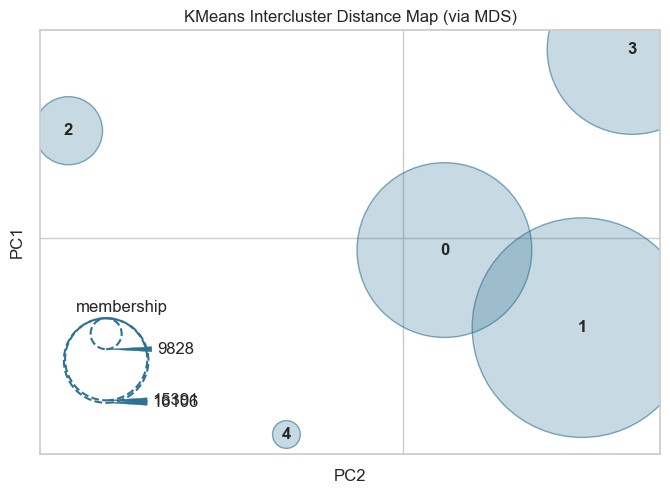

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [49]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca)
visualizer.show()

In [50]:
# Create a dataframe with the weights per component
weights_df = pd.DataFrame(pca.components_, columns=X.columns)
weights_df.index = [f'PC{i+1}' for i in range(weights_df.shape[0])]
weights_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
PC1,0.019066,0.201424,0.327173,0.312060,0.009025,0.037619,-0.044981,0.000647,0.001132,0.017156,...,-0.106832,-0.007948,-0.000932,0.004157,0.007716,0.022416,0.022975,0.019487,0.012228,0.022697
PC2,0.014748,-0.015907,0.020224,0.000248,0.140117,-0.491646,0.467250,0.012576,0.116906,-0.428428,...,-0.018690,-0.016547,-0.009725,0.012696,0.024824,0.014927,-0.006856,-0.007371,-0.006446,0.009185
PC3,0.101662,0.097790,-0.076466,-0.118329,0.034074,0.195052,-0.218577,-0.038128,0.037438,-0.272383,...,-0.096519,-0.008664,-0.008582,-0.013713,-0.023930,-0.036689,-0.023524,0.004070,0.028227,0.167624
PC4,-0.051268,-0.173775,-0.187205,-0.210756,0.253201,-0.130845,0.010698,0.080209,0.200535,0.150954,...,-0.063547,0.023827,0.049669,0.067064,0.048879,0.015774,0.010531,-0.002782,-0.012357,-0.119660
PC5,-0.062684,-0.021337,0.079445,0.023534,0.555845,-0.012633,-0.236891,0.002597,0.507972,-0.070571,...,-0.040489,0.003706,-0.023252,-0.001825,0.021445,0.027844,0.016456,-0.001778,-0.006617,0.000520
PC6,0.166416,-0.194118,0.069110,0.128407,0.037411,-0.002121,-0.003874,-0.049531,0.090326,0.142360,...,0.207205,0.053153,0.000162,-0.025788,-0.027155,0.049472,0.120082,0.045907,-0.002248,-0.387092
PC7,0.164894,0.086718,0.012864,0.052842,0.048150,0.008209,0.028146,-0.272896,-0.085747,-0.078424,...,0.224147,-0.144349,-0.221611,-0.213892,-0.212849,-0.086741,0.095641,0.066706,0.092264,0.336172
PC8,-0.222602,-0.021940,-0.008301,0.005825,0.037816,-0.026621,0.047461,-0.165548,0.023810,0.093789,...,0.046839,-0.115519,-0.041036,0.098917,-0.009964,0.025949,-0.159988,-0.100961,-0.006134,0.234651
PC9,-0.028307,-0.021210,0.007629,0.014697,-0.020731,0.018654,-0.010731,-0.000770,-0.030928,-0.013595,...,0.085280,0.020744,-0.008840,-0.054729,0.010687,0.486186,-0.798812,0.265394,0.088697,-0.029979
PC10,0.010208,0.031511,0.029739,-0.016319,-0.126960,0.012508,0.040697,0.013254,-0.199763,-0.009415,...,-0.202935,-0.017663,0.430115,0.073910,-0.194101,-0.373984,-0.068678,0.394767,0.090598,-0.066790


In [51]:
# Study the weights of the 18th component
comp = abs(weights_df.iloc[17])  # index 17 corresponds to the 18th component
comp = comp.sort_values(ascending=False)
comp

7     0.530159
14    0.447035
28    0.301591
20    0.239836
8     0.236147
22    0.210004
0     0.198070
12    0.181055
13    0.162295
29    0.141592
1     0.141438
33    0.139056
17    0.138596
32    0.130533
31    0.103791
11    0.095603
30    0.090100
25    0.077391
35    0.072900
6     0.069779
34    0.062805
18    0.061686
15    0.059189
21    0.056678
24    0.055526
23    0.052176
26    0.051793
2     0.046092
5     0.045022
10    0.041698
27    0.041329
16    0.037009
9     0.019025
3     0.011597
4     0.010096
37    0.005488
36    0.001787
19    0.000298
Name: PC18, dtype: float64

## Interpretation of the Results

In [52]:
# Map the feature indices to the actual column names
top_features_indices = comp[:37].index.tolist()
top_features = X_beforeNorm.columns[top_features_indices]

# Ensure the top features are valid column names in X_beforeNorm
valid_features = [feature for feature in top_features if feature in X_beforeNorm.columns]
print(f"Valid features: {valid_features}")

# Check if there are any invalid features
invalid_features = [feature for feature in top_features if feature not in X_beforeNorm.columns]
if invalid_features:
    print(f"Invalid features (not found in X_beforeNorm): {invalid_features}")

# Group by cluster labels and calculate mean for each cluster
clustersMeanDF = pd.DataFrame(X_beforeNorm[valid_features].groupby(cluster_labels).mean(), columns=valid_features)
clustersMeanDF = clustersMeanDF.reindex(sorted(clustersMeanDF.columns), axis=1)

transposed_clustersMeanDF = clustersMeanDF.transpose()
transposed_clustersMeanDF

Valid features: ['DistributionChannel_Electronic Distribution', 'MarketSegment_Aviation', 'Age_<24', 'TotalSpecialRequests', 'MarketSegment_Corporate', 'NoShowRate', 'Nationality', 'MarketSegment_Groups', 'MarketSegment_Complementary', 'Age_25-29', 'AverageLeadTime', 'Age_45-49', 'HighSpender', 'Age_40-44', 'Age_35-39', 'MarketSegment_Direct', 'Age_30-34', 'StaysPerYear', 'Age_55-59', 'DistributionChannel_Direct', 'Age_50-54', 'LodgingVsOtherRatio', 'Capped_LodgingRevenue', 'CancellationRate', 'RecentActivity', 'CustomerLoyalty', 'Log_RevenuePerNight', 'RoomNights', 'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Travel Agent/Operator', 'Log_RevenuePerPerson', 'Capped_OtherRevenue', 'MarketSegment_Other', 'PersonsNights', 'DistributionChannel_Corporate', 'Age_>65', 'Age_60-64']


,0,1,2,3,4
Age_25-29,0.088104,0.067828,0.065934,0.079072,0.060082
Age_30-34,0.121508,0.091876,0.096256,0.081931,0.065844
Age_35-39,0.111201,0.090990,0.106634,0.074004,0.074074
Age_40-44,0.124550,0.096770,0.121591,0.079787,0.098868
Age_45-49,0.119210,0.107600,0.119658,0.084855,0.151646
Age_50-54,0.119707,0.128064,0.113553,0.102268,0.157099
Age_55-59,0.096486,0.109180,0.088014,0.083036,0.113169
Age_60-64,0.070160,0.084785,0.062780,0.066987,0.074280
Age_<24,0.039178,0.048135,0.143976,0.235917,0.100000
Age_>65,0.109773,0.174734,0.081604,0.111949,0.104938


In [53]:
# Calculate descriptive statistics for each cluster
descriptive_stats = transposed_clustersMeanDF.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Calculate median for each cluster
median_stats = transposed_clustersMeanDF.median()
print("\nMedian Statistics:")
print(median_stats)

Descriptive Statistics:
                 0            1            2            3            4
count    37.000000    37.000000    37.000000    37.000000    37.000000
mean    165.504011   206.545531   174.647174   154.248848   197.350072
std     891.082089  1061.025878   952.706655   937.333411   957.624145
min       0.000310     0.000000     0.000000     0.000000     0.000206
25%       0.070160     0.008093     0.007224     0.005978     0.064506
50%       0.121508     0.123324     0.113553     0.076735     0.113169
75%       2.638489     2.809427     1.766331     0.111949     4.378691
max    5428.322302  6461.790273  5804.701058  5701.728543  5811.638889

Median Statistics:
0    0.121508
1    0.123324
2    0.113553
3    0.076735
4    0.113169
dtype: float64


In [54]:
# Profile each cluster
cluster_profiles = X_beforeNorm[valid_features].assign(Cluster=cluster_labels).groupby('Cluster').mean()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         DistributionChannel_Electronic Distribution  MarketSegment_Aviation  \
Cluster                                                                        
0                                           0.024773                0.000931   
1                                           0.000000                0.000231   
2                                           0.000102                0.000000   
3                                           0.001299                0.000195   
4                                           0.001132                0.015123   

          Age_<24  TotalSpecialRequests  MarketSegment_Corporate  NoShowRate  \
Cluster                                                                        
0        0.039178              0.627406                 0.076742    0.000670   
1        0.048135              0.655388                 0.001426    0.000000   
2        0.143976              0.419414                 0.000712    0.000119   
3        0.235917    

### Cluster Interpretation

#### Cluster 0 - Corporate Travelers
Cluster 0 has a notable reliance on Travel Agent/Operator distribution channels (89.5%) and a relatively small percentage using Corporate channels (7.8%). The customers in this cluster are mostly younger, with significant segments under 24 (3.9%) and 25-29 (8.8%). They exhibit a moderate rate of special requests. The nationality metric suggests the presence of international clients. The revenue per person and other revenue metrics indicate moderate spending, with an average room night count of 2.64. This cluster has a moderate level of corporate market segment (7.7%) and a notable presence in the 'Other' segment (58.9%).

#### Cluster 1 - Senior Travel Users
Cluster 1 relies heavily on Travel Agent/Operator distribution channels (99%) and has minimal use of Corporate channels (0.8%). This cluster features a higher proportion of older customers, with 17.5% over 65 and 8.5% between 60 and 64. The customers show high levels of special requests and exhibit zero no-show rates. The nationality metric suggests a diverse international base. The revenue per person is moderate, and the room night count averages 2.81. The presence in the 'Other' market segment is significant (63.9%).

#### Cluster 2 - Young Direct Bookers
Cluster 2 has minimal use of travel agent distribution channels (0%) and a small presence in Corporate channels (0.02%) and the highest presence of the direct channel. This cluster comprises mostly younger customers, with significant segments under 24 (14.4%) and 25-29 (6.6%). They exhibit a moderate rate of special requests. The nationality metric indicates a diverse clientele. The revenue per person is low, and the room night count averages 1.77. 

#### Cluster 3 - Spontaneous Group Travelers
Cluster 3 heavily relies on Travel Agent/Operator distribution channels (98%) and has a small presence in Corporate channels (1.3%). This cluster features a higher proportion of older customers, with 11.9% over 65 and the highest proportion of customers younger than 24. Customers show high levels of special requests and most stays per year. The revenue per person is very low, and the room night count averages 0.01. This cluster has a significant presence in the 'Other' market segment (73.1%).

#### Cluster 4 - High-Spending Travel Agent Users
The fourth cluster reveals a high dependence on agent distribution channels (89.2%) and a tiny presence in the tentacles of corporate (2.5%). This group is represented mainly by medium aged clients. The clients have the highest demands for special services. Very high revenue per person and other revenue variables demonstrating the cluster that most spends money, the room night count averages at 5.02 and we also have the highest average lead time.

###  Market Campaigns - Product Recommendations for Different Clusters

#### Marketing Strategy for Cluster 0
The campaigns should improve packages that appeal to both business and leisure guests in order to improve the marketing campaigns. Additionally, highlighting the benefits and ease of making reservations through travel agencies can draw in more clients. Enhancing client happiness can be achieved through customized experiences and offers based on unique needs. Partnerships with travel agents and specifically focused advertisements for young travelers on social media platforms like LinkedIn, where they are most prevalent, should be part of marketing campaigns.

#### Marketing Strategy for Cluster 1: 
The marketeers should concentrate on senior-friendly packages for this market, making sure that guests are comfortable and can easily make reservations. It is best to proactively fulfill special requests in order to improve the experience. Providing special senior discounts and packages in conjunction with internet booking platforms like Booking can increase the number of reservations. The marketing should emphasize the services' dependability and low no-show rates.

#### Marketing Strategy for Cluster 2: 
The hotel should focus on cheap rates and last-minute arrangements facilitation that attract younger customers. More reservations may be gained by accentuating worth against cost and offering varied booking options. Marketing attempts must capitalize on digital channels such as online platforms in general and social media in particular to reach out to younger clients who are looking for cheaper ways of going from place X to Y at a short notice.

#### Marketing Strategy for Cluster 3:
The marketing team should concentrate on packages of group travel and event hosting services for this category. Any specific demands can be met early, as well as drive more bookings through bulk booking discounts. It can also bring in more customers if one works with event planning platforms to provide selective group deals and packages. In marketing, it is important to show the trustworthiness and ease of using travel agents.

#### Marketing Strategy for Cluster 4: 
To attract this market, hotels should focus on their value proposition and premium offerings while creating tailored experiences, luxury packages among others that appeal to high-value customers who seek personalized service. These peculiarities could lead to major customer satisfaction by granting strange requests or designing customised experiences for them. The sales of the reservations can rise by providing exclusive discounts or offers through luxury travel websites or partnering with travel agencies for arrangements made to this marketplace alone by themselves only without any other competitor involved in these specific segments which is one way to target niche markets while still having some competition against rivals within certain sectors such as; “Comprehensive Services Offered” & “Revenue Per Person.”